# Figure of comparison between Ketamine and Midazolam

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import relevant packages
import glob
import numpy as np
import scipy
import nilearn
import nilearn.image
import nilearn.plotting
import nilearn.input_data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc3 as pm
import arviz as az
from pymc3.glm import GLM

In [3]:
# Set session
ses = 2
## Grab group
# compare between groups

medication_cond = pd.read_csv('/home/oad4/ketamine_reconsolidation/kpe_sub_condition.csv')

func_files = glob.glob('/gpfs/gibbs/pi/levy_ifat/Or/kpe/results/ScriptPart_ses%s/modelfit/_subject_id_*/modelestimate/results/zstat8.nii.gz' %(ses))

func_files.sort()
len(func_files)

26

In [4]:
# remove 1315
del func_files[6] #(only session 1,2)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


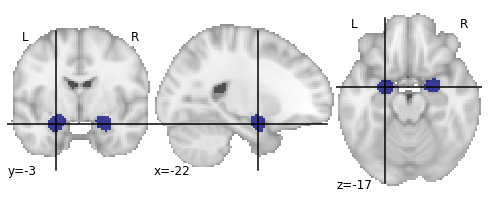

In [5]:
## Amygdala as mask
mask_file = '/gpfs/gibbs/pi/levy_ifat/Or/ROI/amygdala_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=25", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)


masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                                smoothing_fwhm=None, standardize=False,
                                        detrend=False, verbose=9).fit()

In [22]:
t_arr = []
mean_act = []
scr_id = []
#delayed_get_data = dask.delayed(masker.fit_transform)
for func in func_files:
    # get subject number
    scr_id.append('KPE' + func.split('id_')[1].split('/')[0])
    # get average activation
    t_map = masker.transform(func)[0]
    t_arr.append(t_map)
    


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. 

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data 

In [19]:
#t_arr = np.array(t_arr).shape

In [25]:
# grab condition
med_cond = medication_cond[medication_cond.scr_id.isin(scr_id)].med_cond
med_cond = np.array(med_cond)
med_cond

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0])

In [31]:
ketArr = []
midArr = []
for i,g in enumerate(med_cond):
    if g==1:
        print(f'G is one {g}')
        ketArr.append(t_arr[i])
    elif g==0:
        print(f'G is zero {g}')
        midArr.append(t_arr[i])

0
G is one 1
1
G is one 1
2
G is zero 0
3
G is zero 0
4
G is one 1
5
G is one 1
6
G is one 1
7
G is one 1
8
G is one 1
9
G is zero 0
10
G is zero 0
11
G is zero 0
12
G is zero 0
13
G is one 1
14
G is zero 0
15
G is zero 0
16
G is one 1
17
G is one 1
18
G is zero 0
19
G is zero 0
20
G is one 1
21
G is zero 0
22
G is one 1
23
G is one 1
24
G is zero 0


In [33]:
ketArr = np.array(ketArr)
ketArr.shape
midArr = np.array(midArr)
midArr.shape



(12, 559)

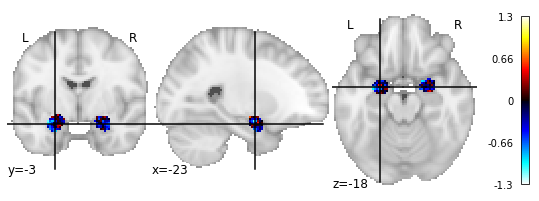

In [37]:
ketMean = masker.inverse_transform(np.mean(ketArr,axis=0))
nilearn.plotting.plot_stat_map(ketMean)

(<Figure size 432x288 with 3 Axes>,
 array([[<Axes3DSubplot:>, <Axes3DSubplot:>]], dtype=object))

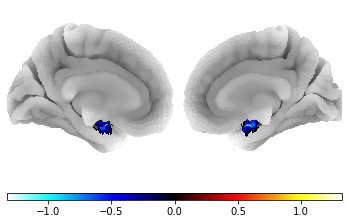

In [40]:
nilearn.plotting.plot_img_on_surf(ketMean,
                                  views=['medial'],
                          hemispheres=['left', 'right'],
                          colorbar=True, threshold = 0.00001)

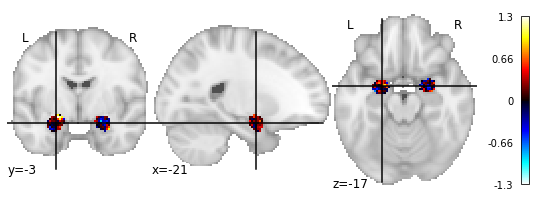

In [35]:
midMean = masker.inverse_transform(np.mean(midArr,axis=0))
nilearn.plotting.plot_stat_map(midMean)

(<Figure size 432x288 with 3 Axes>,
 array([[<Axes3DSubplot:>, <Axes3DSubplot:>]], dtype=object))

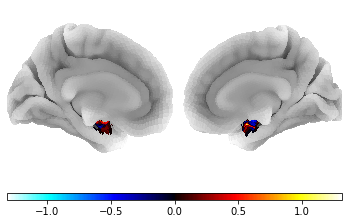

In [41]:
nilearn.plotting.plot_img_on_surf(midMean,
                                  views=['medial'],
                          hemispheres=['left', 'right'],
                          colorbar=True, threshold = 0.00001)